<a href="https://colab.research.google.com/github/ConnorSA/tutorials_ext/blob/master/DADApy_tutorial_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 0: Curse of dimensionality experiment






## Importing and installing the required packages

In [ ]:
# import standard python packages
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")


## Visualising the curse of dimensionality using Gaussians


In [ ]:
from scipy.stats import norm, chi
from scipy import integrate

Imagine an isotropic Normal distribution in $D$ dimensions, for each coordinate $k$ we have

$x_{ik} \sim \mathcal{N}(0, 1)$

### 1D case

For $D=1$ we find a very familiar distribution of points. 

Most of the probability mass lies within 1 standard deviation from the mean. 
We can define a thin shell between $0.95$ and $1.05$ of the standard deviation, and only $4.8$% of data will be sampled in that region!

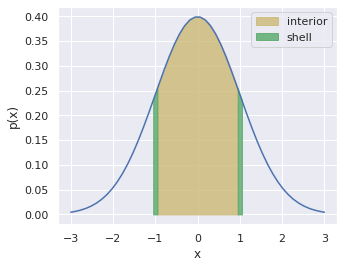

In [ ]:
plt.figure(figsize = (5, 4))

x = np.linspace(-3, 3)
plt.plot(x, norm.pdf(x));

bulk = np.linspace(-0.95, 0.95)
plt.fill_between(bulk, norm.pdf(bulk), color = 'y', alpha = 0.8, label = 'interior')

shell = np.array([-1.05, -0.95])
plt.fill_between(shell, norm.pdf(shell), color = 'g', alpha = 0.8, label = 'shell')
shell = np.array([0.95, 1.05])
plt.fill_between(shell, norm.pdf(shell), color = 'g', alpha = 0.8)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()


In [ ]:
# probability mass in "interior" region
integrate.quad(lambda x: norm.pdf(x), -0.95, 0.95)[0]

0.6578877473830365

In [ ]:
# we can alternatively find the same number by integrating the distribution 
# of the distances, a "chi distribution" with 1 degree of freedom
integrate.quad(lambda x: chi.pdf(x, 1), 0, 0.95)[0]

0.6578877473830365

In [ ]:
# probability mass of "shell" region, very small!
integrate.quad(lambda x: chi.pdf(x, 1), 0.95, 1.05)[0]


0.04839413986517177

### 2D case

For $D = 2$ the standard deviation becomes $\sqrt{2}$, but the situation is similar. 

This time only $7.3$% of the probability mass lies in the same think shell.

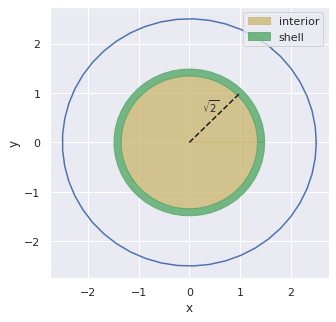

In [ ]:
plt.figure(figsize = (5, 5))


theta = np.linspace(0, 2*np.pi, endpoint=True) 
radius = 2.5
x = radius * np.cos(theta) 
y = radius * np.sin(theta)

plt.plot(x, y);

radii = [0., np.sqrt(2.)*0.95]
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))

xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
plt.fill(np.ravel(xs), np.ravel(ys), color = 'y', alpha = 0.8,  label = 'interior')

radii = [np.sqrt(2.)*0.95, np.sqrt(2.)*1.05]
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))

xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]

plt.fill(np.ravel(xs), np.ravel(ys), color = 'g', alpha = 0.8,  label = 'shell')

plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('$\sqrt{2}$',(0.25, 0.6))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()



In [ ]:
D = 3

integrate.quad(lambda x: chi.pdf(x, D), np.sqrt(D) * 0.95, np.sqrt(D) * 1.05)[0]

0.09235410446434564

### High-dimensional case

For $D = 3$ the number of points in the think shell grows to almost $10$%!



In [ ]:

D = 3

integrate.quad(lambda x: chi.pdf(x, D), np.sqrt(D) * 0.95, np.sqrt(D) * 1.05)


(0.09235410446434564, 1.0253365319495349e-15)

What happens if we compute the same quantities for very high dimensions?

In the following we do that in a foor loop up to $2^{10} = 1024$.

In [ ]:
Ds = [1] + list(2**np.arange(1, 11,))

interior_mass = []
shell_mass = []
exterior_mass = []

for D in Ds:
    
    inner_lim = np.sqrt(D) * 0.95
    outer_lim = np.sqrt(D) * 1.05
    
    mass, _ = integrate.quad(lambda x: chi.pdf(x, D), 0, inner_lim)
    interior_mass.append(mass)
    mass, _ = integrate.quad(lambda x: chi.pdf(x, D), inner_lim, outer_lim)
    shell_mass.append(mass)
    mass, _ = integrate.quad(lambda x: chi.pdf(x, D), outer_lim, np.inf)
    exterior_mass.append(mass)

interior_mass = np.array(interior_mass)
shell_mass = np.array(shell_mass)
interior_mass = np.array(interior_mass)
    
    

Text(0, 0.5, 'proportion of mass')

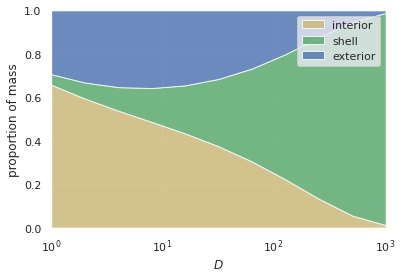

In [ ]:
plt.figure()
plt.stackplot(Ds, interior_mass, shell_mass, exterior_mass,
              labels=['interior','shell', 'exterior'], colors = ['y','g','b'], alpha = 0.8)

plt.ylim(0, 1)
plt.xlim(1, 1024)
plt.xscale('log')
plt.legend()
plt.xlabel('$D$')
plt.ylabel('proportion of mass')

For very high dimensional spaces (say $D \geq 100$), most points lie on a thin shell at the boundary of a hypersphere!
Almost no points are either inside the sphere or outside of it.

This can also be seen looking at the distribution of distances between points. On a hypersphere of large dimension $D$, the average distance between points is roughly equal to $\sqrt{D} \cdot R$ (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.764.481&rep=rep1&type=pdf).

What kind of distribution can we expect?

In [ ]:
from scipy.spatial.distance import pdist
X = np.random.normal(0, 1, (1000, 1000))
dists = pdist(X)

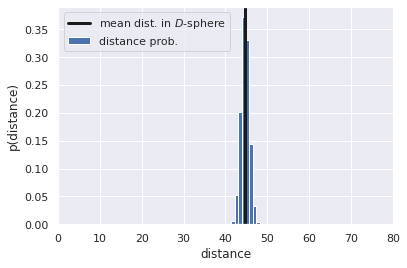

In [ ]:
plt.figure()
plt.hist(dists, density = True, label = 'distance prob.')
plt.xlim(0, 80)

plt.axvline(np.sqrt(1000)*np.sqrt(2),  c = 'k', lw = 3,  label = 'mean dist. in $D$-sphere')

plt.xlabel('distance')
plt.ylabel('p(distance)')

plt.legend()

Essentially ***all points are at the same distance from each other***!

This is a huge problem. Data in high dimensions has no concept of "proximity", distances are useless, most machine learning methods are doomed to fail miserably...

